# This is Portfolio Optimization using PyPortfolio


In [11]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import pypfopt
from datetime import datetime
from pypfopt import EfficientSemivariance
from pypfopt import objective_functions
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt import HRPOpt
from collections import OrderedDict
import yfinance as yf
import matplotlib.pyplot as plt

In [12]:
# !pip install --user pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')
    
#os.chdir('C:/Users/MarcO/Google Drive/Python')
os.chdir('G:/My Drive/Python')

In [4]:
tickers = ["AAPL"]

df_tickers = pd.DataFrame(tickers)

df_tickers.to_csv('aapl.csv', header = ['tickers'] ,index=False)

In [3]:
#tickers = ["MGK", "EWW", "SPAB", "VV", "VB","VGK"]
tickers = ['MGK', 'EWW', 'SPAB', 'VV', 'VB', 'VGK',
          'VOX', 'VCR', 'VDC', 'VIG', 'VWOB', 'VDE', 'VXF', 'VFH', 'VEU', 'VSS', 'VEA', 
          'VWO', 'VPL', 'VNQI', 'VUG', 'VHT', 'VYM', 'VIS', 'VGT', 'VCIT', 'VGIT', 'VIGI', 'VYMI', 
          'VCLT', 'VGLT', 'VAW', 'VO', 'VOT', 'VOE', 'VMBS', 'VNQ', 'VONE', 'VONG', 'VONV', 'VTWO', 
          'VTWG', 'VTWV', 'VTHR', 'VOO', 'VOOG', 'VOOV', 'VIOO', 'VIOG', 'VIOV', 'VCSH', 'VTIP','VGSH', 
          'VBK', 'VBR', 'VTEB', 'VTC', 'VXUS', 'VTI', 'VT', 'VFMV', 'VFMO', 'VFMF', 'VFQY', 
          'VFVA', 'VPU', 'VTV', 'BIV', 'BLV', 'BSV', 'BND', 'BNDX', 'IVOO', 'IVOG', 'IVOV', 
          'MGC',  'MGV', 'EDV']

df_tickers = pd.DataFrame(tickers)

df_tickers.to_csv('tickers.csv', header = ['tickers'] ,index=False)

#tickers = pd.read_excel("C:/Users/MarcO/Google Drive/Finances/CatalogoDeValores.xlsx")

In [4]:
ohlc = yf.download(tickers, period="max")

# Save historical data
ohlc.to_csv('ohlc.csv')

[*********************100%***********************]  78 of 78 completed


In [5]:
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()

,BIV,BLV,BND,BNDX,BSV,EDV,EWW,IVOG,IVOO,IVOV,...,VTWO,VTWV,VUG,VV,VWO,VWOB,VXF,VXUS,VYM,VYMI
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-16,73.379997,69.760002,70.790001,48.150002,75.209999,76.000000,62.230000,93.480003,88.089996,81.339996,...,75.120003,125.500000,277.959991,201.119995,39.939999,60.509998,147.399994,54.759998,106.800003,62.110001
2023-08-17,73.279999,69.410004,70.720001,48.080002,75.269997,75.459999,61.549999,92.160004,86.959999,80.430000,...,74.260002,124.459999,275.019989,199.470001,40.070000,60.369999,145.600006,54.520000,106.589996,62.009998
2023-08-18,73.510002,69.779999,70.870003,48.240002,75.309998,75.730003,61.849998,92.580002,87.190002,80.589996,...,74.669998,125.059998,274.649994,199.660004,39.820000,60.400002,146.330002,54.430000,106.870003,61.930000
2023-08-21,73.129997,69.000000,70.529999,48.060001,75.209999,74.360001,61.740002,92.800003,87.309998,80.529999,...,74.529999,124.309998,278.369995,201.020004,39.910000,60.029999,146.619995,54.590000,106.570000,62.049999
2023-08-22,73.114998,69.160004,70.543602,48.158100,75.154999,74.609200,61.969601,92.424004,87.000000,80.220001,...,74.349998,123.809998,278.609985,200.889999,39.869999,60.180000,146.199997,54.540001,106.250000,62.032600


In [6]:
# DOWNLOAD MARKET PRICE
market_prices = yf.download("^GSPC", period="max")["Adj Close"]
market_prices.head()

[*********************100%***********************]  1 of 1 completed


Date
1927-12-30    17.660000
1928-01-03    17.760000
1928-01-04    17.719999
1928-01-05    17.549999
1928-01-06    17.660000
Name: Adj Close, dtype: float64

In [16]:
#prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

In [20]:
prices.to_csv('prices.csv')

In [7]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

C:\Users\Marcos\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


,BIV,BLV,BND,BNDX,BSV,EDV,EWW,IVOG,IVOO,IVOV,...,VTWO,VTWV,VUG,VV,VWO,VWOB,VXF,VXUS,VYM,VYMI
BIV,0.003670,0.005895,0.002736,0.001422,0.001229,0.009830,-0.001746,-0.000482,-0.000964,-0.000785,...,-0.001100,-0.000792,-0.001215,-0.001641,-0.002570,0.002372,-0.001781,-0.000707,-0.002034,0.000053
BLV,0.005895,0.013803,0.005089,0.003022,0.001884,0.023061,-0.004033,-0.000945,-0.001939,-0.001614,...,-0.002389,-0.001749,-0.002347,-0.003404,-0.005503,0.005408,-0.003532,-0.002005,-0.004008,0.000326
BND,0.002736,0.005089,0.002838,0.001357,0.000868,0.007969,-0.000325,0.000439,0.000076,0.000189,...,-0.000041,0.000115,0.000095,-0.000276,-0.000737,0.002596,-0.000347,0.000203,-0.000763,0.000920
BNDX,0.001422,0.003022,0.001357,0.001496,0.000508,0.004703,0.000787,0.000639,0.000496,0.000299,...,0.000498,0.000308,0.000858,0.000568,0.000603,0.001565,0.000735,0.000485,0.000297,0.000601
BSV,0.001229,0.001884,0.000868,0.000508,0.000979,0.003115,-0.001245,-0.000134,-0.000185,-0.000165,...,-0.000255,-0.000188,-0.000629,-0.000828,-0.001498,0.000887,-0.000805,0.000031,-0.000913,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWOB,0.002372,0.005408,0.002596,0.001565,0.000887,0.004892,0.011298,0.010125,0.010414,0.010411,...,0.010445,0.010436,0.009774,0.008740,0.009608,0.008341,0.010767,0.009310,0.007473,0.010672
VXF,-0.001781,-0.003532,-0.000347,0.000735,-0.000805,-0.017559,0.044029,0.039773,0.041115,0.038587,...,0.045169,0.041064,0.043041,0.041681,0.048700,0.010767,0.052085,0.032857,0.038821,0.032328
VXUS,-0.000707,-0.002005,0.000203,0.000485,0.000031,-0.012911,0.033649,0.029638,0.031289,0.029150,...,0.032962,0.029869,0.029982,0.028433,0.034788,0.009310,0.032857,0.033428,0.024443,0.030679
VYM,-0.002034,-0.004008,-0.000763,0.000297,-0.000913,-0.015471,0.039178,0.027091,0.029514,0.028843,...,0.030657,0.029700,0.033163,0.034998,0.040958,0.007473,0.038821,0.024443,0.037203,0.025576


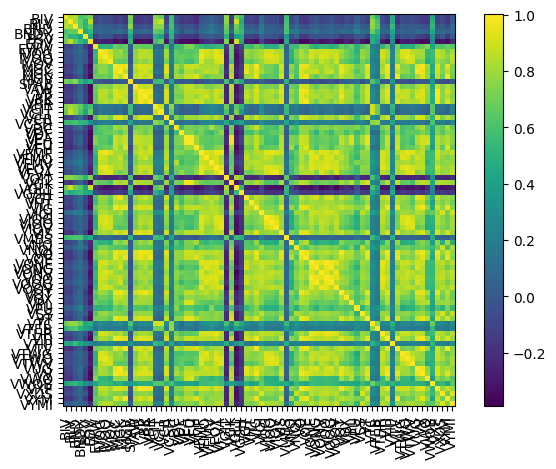

In [8]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

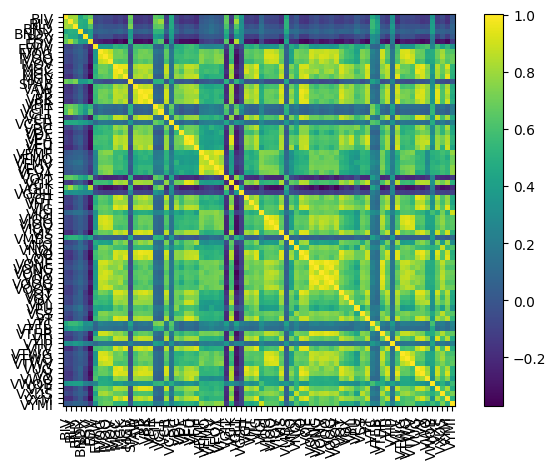

In [9]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [155]:
# THIS IS TO ESTIMATE THE RETURNS
# not great, but a start

mu = expected_returns.capm_return(prices) #expected_returns.ema_historical_return(prices)
mu

BIV     0.018889
BLV     0.017627
BND     0.020272
BNDX    0.021098
BSV     0.019243
          ...   
VWOB    0.030377
VXF     0.066279
VXUS    0.050639
VYM     0.059702
VYMI    0.051064
Name: mkt, Length: 78, dtype: float64

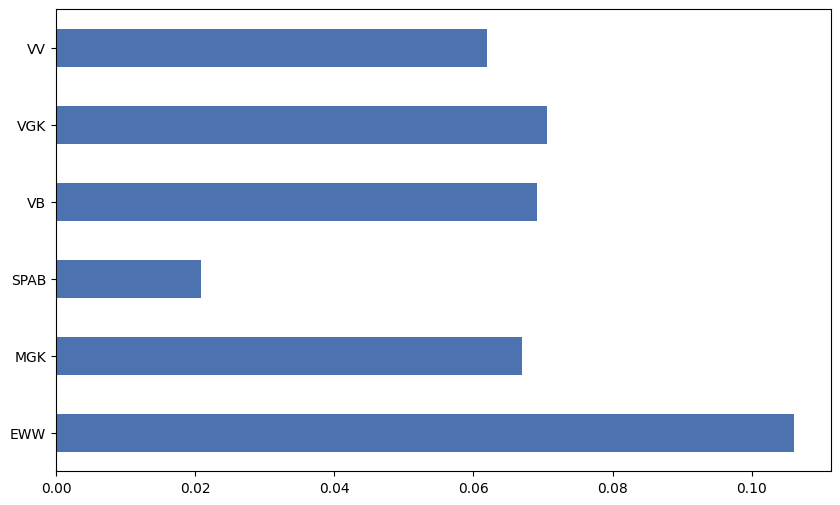

In [13]:
#mu.plot.barh(figsize=(10,6));

In [156]:
max(mu)

0.09896892891535716

In [142]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(0, 1)) # THIS IS A LONG-LONG PORTFOLIO!!!
ef.min_volatility()
weights = ef.clean_weights()

dfweights = pd.DataFrame(weights, columns=weights.keys(), index = ['weights'])

# output portfolilio to csv for use in R:
from pathlib import Path  
filepath = Path('C:/Users/MarcO/Google Drive/R/some_port.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
dfweights.to_csv(filepath,index=False)

weights


OrderedDict([('BIV', 0.0),
             ('BLV', 0.0),
             ('BND', 0.0),
             ('BNDX', 0.01617),
             ('BSV', 0.06755),
             ('EDV', 0.0),
             ('EWW', 0.0),
             ('IVOG', 0.0),
             ('IVOO', 0.0),
             ('IVOV', 0.0),
             ('MGC', 0.0),
             ('MGK', 0.0),
             ('MGV', 0.0),
             ('SPAB', 0.0),
             ('VAW', 0.0),
             ('VB', 0.0),
             ('VBK', 0.0),
             ('VBR', 0.0),
             ('VCIT', 0.0),
             ('VCLT', 0.0),
             ('VCR', 0.0),
             ('VCSH', 0.03752),
             ('VDC', 0.0),
             ('VDE', 0.0),
             ('VEA', 0.0),
             ('VEU', 0.0),
             ('VFH', 0.00391),
             ('VFMF', 0.00015),
             ('VFMO', 0.0),
             ('VFMV', 0.00085),
             ('VFQY', 0.0),
             ('VFVA', 0.0),
             ('VGIT', 0.0),
             ('VGK', 0.0),
             ('VGLT', 0.0),
             ('VG

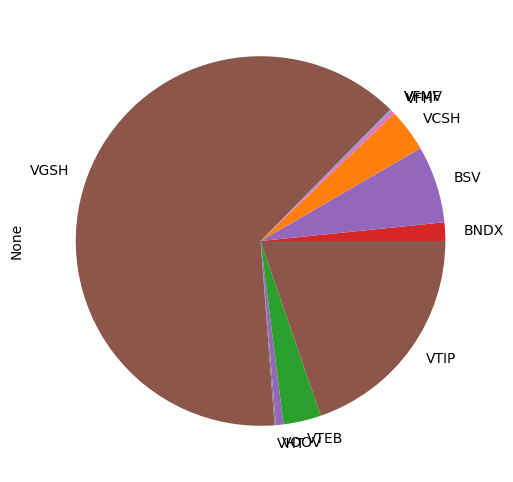

In [127]:
pd.Series(weights).plot.pie(figsize=(6,6), normalize = False);

In [144]:
# THIS OUTPUTS THE WEIGHTS (LONG) OF THE GLOBAL MIN. VARIANCE PORTFOLIO
#  WITH L2 REGULARIZATION

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(0, 1)) # THIS IS A LONG-LONG PORTFOLIO!!!
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamma is the tuning parameter
ef.min_volatility()
weights = ef.clean_weights()

dfweights = pd.DataFrame(weights, columns=weights.keys(), index = ['weights'])

# output portfolilio to csv for use in R:
from pathlib import Path  
filepath = Path('C:/Users/MarcO/Google Drive/R/some_port2.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
dfweights.to_csv(filepath,index=False)

weights
min_var_reg = weights
min_var_reg = pd.Series(min_var_reg)

In [129]:
min_var_reg

BIV     0.03722
BLV     0.02852
BND     0.03687
BNDX    0.04081
BSV     0.04248
         ...   
VWOB    0.02859
VXF     0.00000
VXUS    0.01061
VYM     0.00798
VYMI    0.01904
Length: 78, dtype: float64

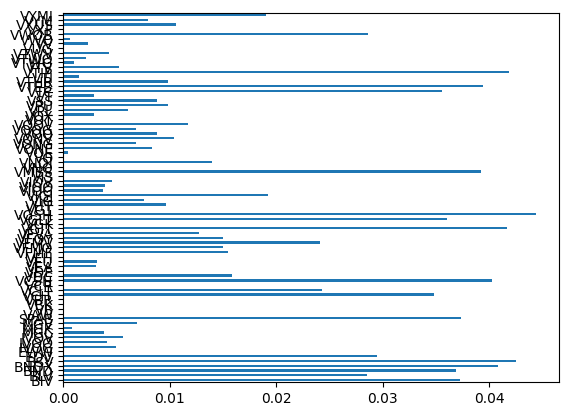

In [130]:
pd.Series(weights).plot.barh();

In [131]:
ef.portfolio_performance(verbose=True);

Annual volatility: 4.1%


In [132]:
prices

,BIV,BLV,BND,BNDX,BSV,EDV,EWW,IVOG,IVOO,IVOV,...,VTWO,VTWV,VUG,VV,VWO,VWOB,VXF,VXUS,VYM,VYMI
Date,,,,,,,,,,,,,,,,,,,,,
1996-03-18,NaN,NaN,NaN,NaN,NaN,NaN,5.917729,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-19,NaN,NaN,NaN,NaN,NaN,NaN,5.917729,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-20,NaN,NaN,NaN,NaN,NaN,NaN,6.095973,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-21,NaN,NaN,NaN,NaN,NaN,NaN,6.060325,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-22,NaN,NaN,NaN,NaN,NaN,NaN,6.131621,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,74.269997,72.660004,71.750000,48.200001,75.290001,82.099998,62.619999,93.860001,89.010002,82.750000,...,75.970001,124.209999,280.130005,201.100006,40.590000,61.130001,149.690002,55.389999,105.540001,62.389999
2023-07-11,74.410004,73.010002,71.900002,48.230000,75.320000,82.800003,63.200001,94.820000,89.970001,83.809998,...,76.669998,126.190002,281.609985,202.539993,40.950001,61.540001,151.710007,55.930000,106.570000,62.970001
2023-07-12,75.070000,73.830002,72.470001,48.450001,75.620003,83.930000,63.549999,95.489998,90.660004,84.349998,...,77.519997,127.239998,284.970001,204.080002,41.730000,62.119999,152.860001,56.970001,107.029999,64.059998


# Now MINIMIZING SEMI-VARIANCE (down variance)

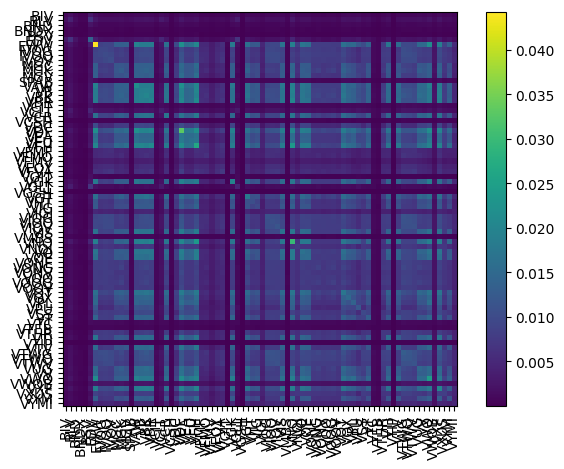

In [145]:
semicov = risk_models.semicovariance(prices, benchmark=0)
plotting.plot_covariance(semicov);

In [13]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()

In [147]:
es = EfficientSemivariance(mu, returns)
es.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamma is the tuning parameter
es.efficient_return(0.07)
es.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual semi-deviation: 16.0%
Sortino Ratio: 0.31


In [79]:
weights_sv = es.clean_weights()
weights_sv

OrderedDict([('BIV', 0.00661),
             ('BLV', 0.0),
             ('BND', 0.00555),
             ('BNDX', 0.00537),
             ('BSV', 0.00926),
             ('EDV', 0.0),
             ('EWW', 0.05545),
             ('IVOG', 0.01166),
             ('IVOO', 0.01298),
             ('IVOV', 0.01287),
             ('MGC', 0.02081),
             ('MGK', 0.02703),
             ('MGV', 0.01611),
             ('SPAB', 0.00547),
             ('VAW', 0.01485),
             ('VB', 0.00871),
             ('VBK', 0.00745),
             ('VBR', 0.00978),
             ('VCIT', 0.00651),
             ('VCLT', 0.0),
             ('VCR', 0.01456),
             ('VCSH', 0.00943),
             ('VDC', 0.0228),
             ('VDE', 0.03704),
             ('VEA', 0.02069),
             ('VEU', 0.01682),
             ('VFH', 0.0048),
             ('VFMF', 0.01336),
             ('VFMO', 0.00992),
             ('VFMV', 0.01244),
             ('VFQY', 0.01277),
             ('VFVA', 0.01107),
          

# MINIMIZE RISK GIVEN SOME RETURN TARGET

In [157]:
# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.05, market_neutral=False)
weights = ef.clean_weights()
weights

OrderedDict([('BIV', 0.01441),
             ('BLV', 0.01423),
             ('BND', 0.01435),
             ('BNDX', 0.01453),
             ('BSV', 0.01449),
             ('EDV', 0.01488),
             ('EWW', 0.01732),
             ('IVOG', 0.01229),
             ('IVOO', 0.01215),
             ('IVOV', 0.0122),
             ('MGC', 0.01221),
             ('MGK', 0.01185),
             ('MGV', 0.01256),
             ('SPAB', 0.0145),
             ('VAW', 0.0099),
             ('VB', 0.00967),
             ('VBK', 0.00958),
             ('VBR', 0.00967),
             ('VCIT', 0.01424),
             ('VCLT', 0.01392),
             ('VCR', 0.00994),
             ('VCSH', 0.0144),
             ('VDC', 0.01186),
             ('VDE', 0.0097),
             ('VEA', 0.01221),
             ('VEU', 0.01209),
             ('VFH', 0.00967),
             ('VFMF', 0.01946),
             ('VFMO', 0.01945),
             ('VFMV', 0.01777),
             ('VFQY', 0.01947),
             ('VFVA', 0.02),
    

In [152]:
ef.portfolio_performance(verbose=True);

Expected annual return: 5.0%
Annual volatility: 9.2%
Sharpe Ratio: 0.32


In [158]:
dfweights = pd.DataFrame(weights, columns=weights.keys(), index = ['weights'])

# output portfolilio to csv for use in R:
filepath = Path('C:/Users/MarcO/Google Drive/R/some_port4.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
dfweights.to_csv(filepath,index=False)


# Hierarchical Risk Parity (HRP)

In [160]:
rets = expected_returns.returns_from_prices(prices)
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('BIV', 0.01131),
             ('BLV', 0.00418),
             ('BND', 0.01672),
             ('BNDX', 0.06274),
             ('BSV', 0.07335),
             ('EDV', 0.00108),
             ('EWW', 0.00041),
             ('IVOG', 0.0002),
             ('IVOO', 0.00205),
             ('IVOV', 0.00074),
             ('MGC', 0.00044),
             ('MGK', 0.00074),
             ('MGV', 0.00032),
             ('SPAB', 0.01734),
             ('VAW', 0.00024),
             ('VB', 0.00063),
             ('VBK', 0.00063),
             ('VBR', 0.00028),
             ('VCIT', 0.00895),
             ('VCLT', 0.00101),
             ('VCR', 0.0002),
             ('VCSH', 0.05191),
             ('VDC', 0.0007),
             ('VDE', 0.00039),
             ('VEA', 0.00031),
             ('VEU', 0.0003),
             ('VFH', 0.00021),
             ('VFMF', 0.00256),
             ('VFMO', 0.00024),
             ('VFMV', 0.00037),
             ('VFQY', 0.00014),
             ('VFVA', 0.00021),


In [161]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 1.8%
Annual volatility: 2.1%
Sharpe Ratio: -0.11


In [162]:
dfweights = pd.DataFrame(weights, columns=weights.keys(), index = ['weights'])
filepath = Path('C:/Users/MarcO/Google Drive/R/hrp_port.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
dfweights.to_csv(filepath,index=False)

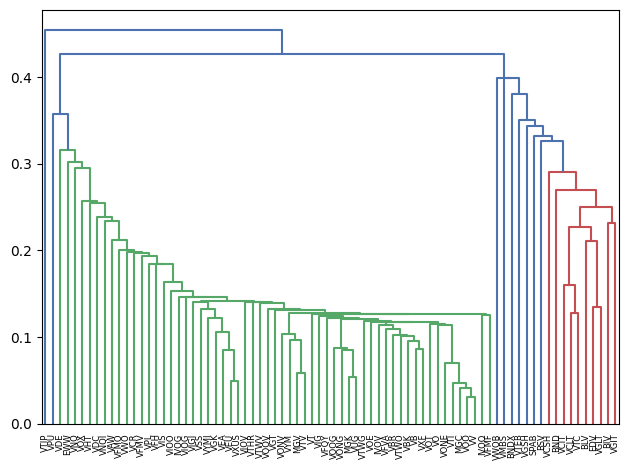

In [163]:
plotting.plot_dendrogram(hrp); 

##  MAX SHARPE WITH CONSTRAINTS (for adding to portfolio)

In [164]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
#ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)


######## ADDING THE INVESTED PORTFOLIO AS RESTRICTIONS #############
eww_index = ef.tickers.index("EWW")
ef.add_constraint(lambda w: w[eww_index] == 0.0709)

mgk_index = ef.tickers.index("MGK")
ef.add_constraint(lambda w: w[mgk_index] == 0.1398)

spab_index = ef.tickers.index("SPAB")
ef.add_constraint(lambda w: w[spab_index] == 0.2729)

vb_index = ef.tickers.index("VB")
ef.add_constraint(lambda w: w[vb_index] == 0.1080)

vgk_index = ef.tickers.index("VGK")
ef.add_constraint(lambda w: w[vgk_index] == 0.1104)

vv_index = ef.tickers.index("VV")
ef.add_constraint(lambda w: w[vv_index] == 0.1309)


ef.max_sharpe()
weights = ef.clean_weights()

In [165]:
weights

OrderedDict([('BIV', 0.0),
             ('BLV', 0.0),
             ('BND', 0.0),
             ('BNDX', 0.0),
             ('BSV', 0.0),
             ('EDV', 0.0),
             ('EWW', 0.0709),
             ('IVOG', 0.0),
             ('IVOO', 0.0),
             ('IVOV', 0.0),
             ('MGC', 0.0),
             ('MGK', 0.1398),
             ('MGV', 0.0),
             ('SPAB', 0.2729),
             ('VAW', 0.0),
             ('VB', 0.108),
             ('VBK', 0.0),
             ('VBR', 0.0),
             ('VCIT', 0.0),
             ('VCLT', 0.0),
             ('VCR', 0.0),
             ('VCSH', 0.0),
             ('VDC', 0.0),
             ('VDE', 0.0),
             ('VEA', 0.0),
             ('VEU', 0.0),
             ('VFH', 0.0),
             ('VFMF', 0.0),
             ('VFMO', 0.0),
             ('VFMV', 0.0),
             ('VFQY', 0.0),
             ('VFVA', 0.1671),
             ('VGIT', 0.0),
             ('VGK', 0.1104),
             ('VGLT', 0.0),
             ('VGSH', 0.

# CALCULATE RETURNS AND COMPARE WITH MARKET

In [17]:
# Define the invested_portfolio as a Python variable
invested_portfolio = {
    'BIV': 0.0,
    'BLV': 0.0,
    'BND': 0.0,
    'BNDX': 0.0,
    'BSV': 0.0,
    'EDV': 0.0,
    'EWW': 0.0709,
    'IVOG': 0.0,
    'IVOO': 0.0,
    'IVOV': 0.0,
    'MGC': 0.0,
    'MGK': 0.1398,
    'MGV': 0.0,
    'SPAB': 0.2729,
    'VAW': 0.0,
    'VB': 0.108,
    'VBK': 0.0,
    'VBR': 0.0,
    'VCIT': 0.0,
    'VCLT': 0.0,
    'VCR': 0.0,
    'VCSH': 0.0,
    'VDC': 0.0,
    'VDE': 0.0,
    'VEA': 0.0,
    'VEU': 0.0,
    'VFH': 0.0,
    'VFMF': 0.0,
    'VFMO': 0.0,
    'VFMV': 0.0,
    'VFQY': 0.0,
    'VFVA': 0.1671,
    'VGIT': 0.0,
    'VGK': 0.1104,
    'VGLT': 0.0,
    'VGSH': 0.0,
    'VGT': 0.0,
    'VHT': 0.0,
    'VIG': 0.0,
    'VIGI': 0.0,
    'VIOG': 0.0,
    'VIOO': 0.0,
    'VIOV': 0.0,
    'VIS': 0.0,
    'VMBS': 0.0,
    'VNQ': 0.0,
    'VNQI': 0.0,
    'VO': 0.0,
    'VOE': 0.0,
    'VONE': 0.0,
    'VONG': 0.0,
    'VONV': 0.0,
    'VOO': 0.0,
    'VOOG': 0.0,
    'VOOV': 0.0,
    'VOT': 0.0,
    'VOX': 0.0,
    'VPL': 0.0,
    'VPU': 0.0,
    'VSS': 0.0,
    'VT': 0.0,
    'VTC': 0.0,
    'VTEB': 0.0,
    'VTHR': 0.0,
    'VTI': 0.0,
    'VTIP': 0.0,
    'VTV': 0.0,
    'VTWG': 0.0,
    'VTWO': 0.0,
    'VTWV': 0.0,
    'VUG': 0.0,
    'VV': 0.1309,
    'VWO': 0.0,
    'VWOB': 0.0,
    'VXF': 0.0,
    'VXUS': 0.0,
    'VYM': 0.0,
    'VYMI': 0.0
}

invested_portfolio = pd.Series(invested_portfolio)

# Convert dictionary to pandas Series for easier manipulation
invested_portfolio = pd.Series(invested_portfolio)

# Select the price data for the date range specified
start_date = pd.to_datetime('2023-06-01')
end_date = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))

# Select prices in the date range
prices_in_range = prices.loc[start_date:end_date]

# Compute daily returns for each stock
stock_returns = prices_in_range.pct_change()

# Compute daily returns for the market
market_returns = market_prices.pct_change()

# Compute the daily return of the portfolio
portfolio_returns = (invested_portfolio * stock_returns).sum(axis=1)

# Drop the first row because it will be NaN
portfolio_returns = portfolio_returns.dropna()
market_returns = market_returns.dropna()

# Merge the two Series into a DataFrame for plotting
returns_df = pd.DataFrame({
    'Portfolio': portfolio_returns,
    'Market': market_returns
})

returns_df

,Portfolio,Market
Date,,
1928-01-03,NaN,0.005663
1928-01-04,NaN,-0.002252
1928-01-05,NaN,-0.009594
1928-01-06,NaN,0.006268
1928-01-09,NaN,-0.009060
...,...,...
2023-08-16,-0.006240,-0.007555
2023-08-17,-0.006547,-0.007713
2023-08-18,0.001464,-0.000149


# PLOT RETURNS

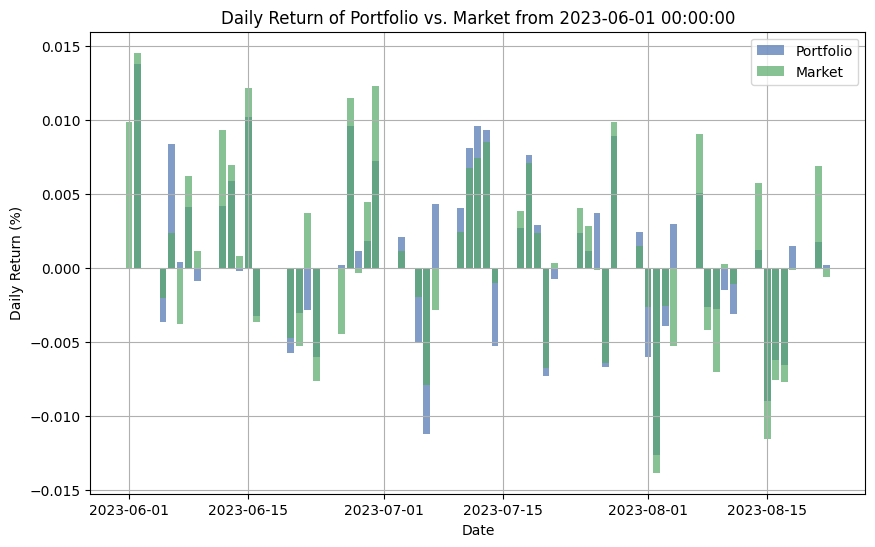

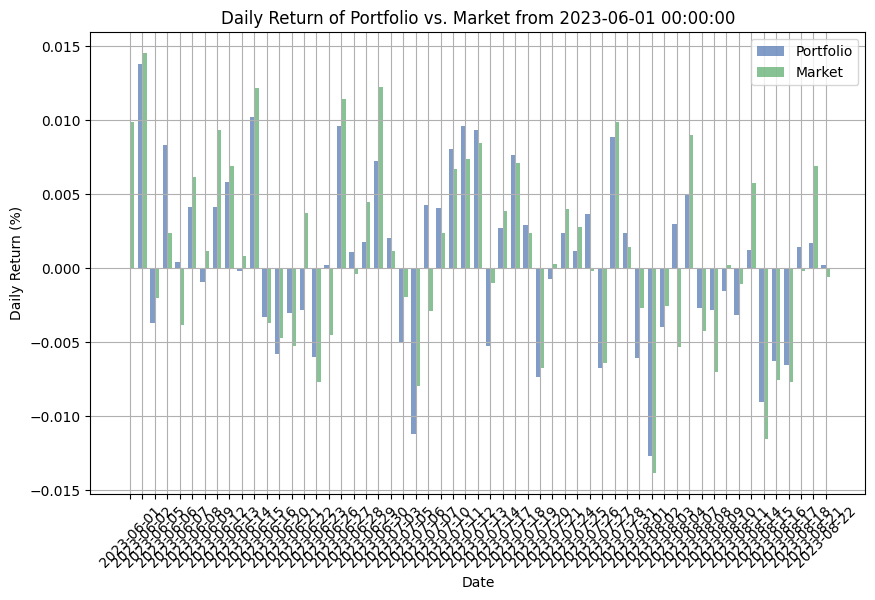

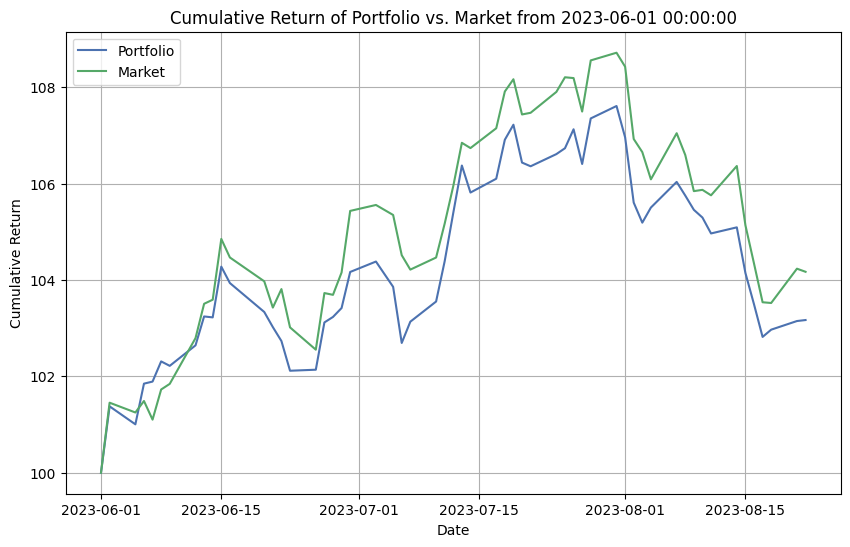

In [18]:
# Creating new dataframe with returns_df from start_date
returns_df1 = returns_df.loc[start_date:]


# Plotting daily returns
plt.figure(figsize=(10,6))
plt.bar(returns_df1.index, returns_df1['Portfolio'], alpha=0.7, label='Portfolio')
plt.bar(returns_df1.index, returns_df1['Market'], alpha=0.7, label='Market')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Daily Return of Portfolio vs. Market from {}'.format(start_date))
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Generate x values for each pair of bars
x = np.arange(len(returns_df1))

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10,6))

# Make the bars slightly narrower so they can fit side by side
bar_width = 0.35

# Plotting daily returns
ax.bar(x - bar_width/2, returns_df1['Portfolio'], bar_width, alpha=0.7, label='Portfolio')
ax.bar(x + bar_width/2, returns_df1['Market'], bar_width, alpha=0.7, label='Market')

# Set the x ticks to be the dates
ax.set_xticks(x)
ax.set_xticklabels(returns_df1.index.date, rotation=45)

ax.set_xlabel('Date')
ax.set_ylabel('Daily Return (%)')
ax.set_title('Daily Return of Portfolio vs. Market from {}'.format(start_date))
ax.legend(loc='upper right')
ax.grid(True)

plt.show()

# Calculating cumulative returns
returns_df1_cumulative = (1 + returns_df1).cumprod()

# Ensure the first value is 100 by dividing by the value at start_date
returns_df1_cumulative = returns_df1_cumulative*100 / returns_df1_cumulative.loc[start_date]

# Plotting cumulative returns
plt.figure(figsize=(10,6))
plt.plot(returns_df1_cumulative.index, returns_df1_cumulative['Portfolio'], label='Portfolio')
plt.plot(returns_df1_cumulative.index, returns_df1_cumulative['Market'], label='Market')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Portfolio vs. Market from {}'.format(start_date))
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# MONTE CARLO SIMULATIONS

In [20]:
μ  = np.mean(returns_df['Portfolio'])
ρ  = 0.95
ν  = 0.001#np.std(returns_df['Portfolio'])#
S0 = 100
h0 = 0
n = 252
simul = 50

def simulate_asset_price_path(μ=μ, S0=S0, h0=h0, n=n, ρ=ρ, ν=ν):
    s = np.empty(n+1)
    s[0] = np.log(S0)

    h = h0
    for t in range(n):
        s[t+1] = s[t] + μ + np.exp(h) * np.random.normal()
        h = ρ * h + ν * np.random.normal()

    return np.exp(s)

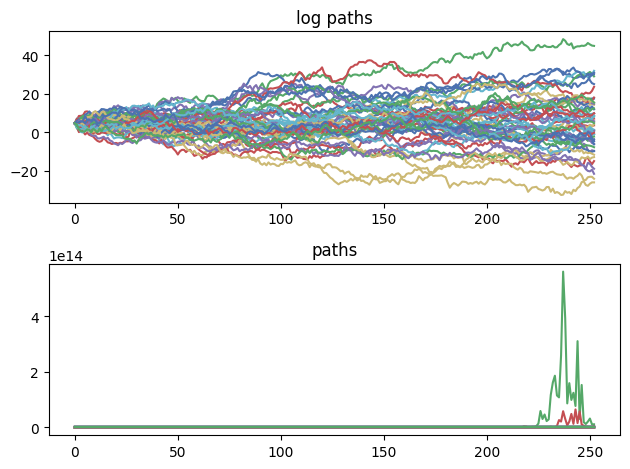

In [21]:
fig, axes = plt.subplots(2, 1)
sim_port = np.zeros([simul])

titles = 'log paths', 'paths'
transforms = np.log, lambda x: x
for ax, transform, title in zip(axes, transforms, titles):
    for i in range(simul):
        path = simulate_asset_price_path()
        sim_port[i] = path[-1]
        ax.plot(transform(path))
    ax.set_title(title)

fig.tight_layout()
plt.show()

(array([95.,  5.,  2.,  4.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         1.,  1.]),
 array([  0.        ,  26.66666667,  53.33333333,  80.        ,
        106.66666667, 133.33333333, 160.        , 186.66666667,
        213.33333333, 240.        , 266.66666667, 293.33333333,
        320.        , 346.66666667, 373.33333333, 400.        ]),
 <BarContainer object of 15 artists>)

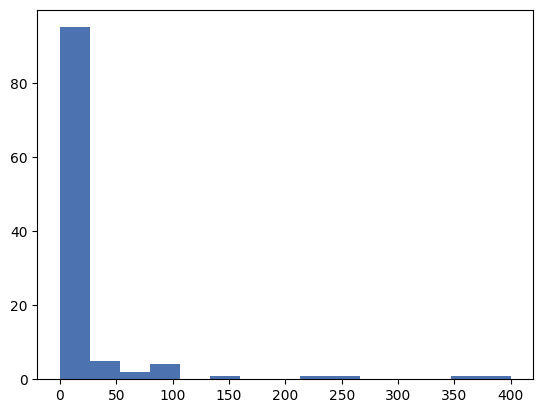

In [144]:
plt.hist(sim_port, bins = 15, range = (0,400))

In [139]:
len(path)

253

In [81]:
path[-1]

6.172829707769173e-05

In [88]:
test = np.array([1,2,3])
test

array([1, 2, 3])

In [89]:
test[-1]

3

In [94]:
range(2)

range(0, 2)

In [107]:
sim_port = np.zeros([simul])

In [108]:
len(sim_port)

200

In [127]:
μ

0.0019031716230493443